In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'perm(D)')

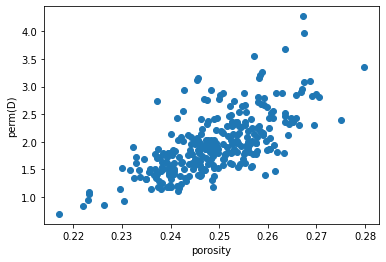

In [3]:
#Data
#Sandstone
phi_s = np.abs(np.random.normal(0.25,0.01,300))
swc_s = np.abs(np.random.normal(0.1,0.01,300))
k_s = 8.58102*(phi_s**(4.4))/(swc_s**2)
plt.scatter(phi_s,k_s)
plt.xlabel('porosity')
plt.ylabel('perm(D)')

Text(0, 0.5, 'perm(D)')

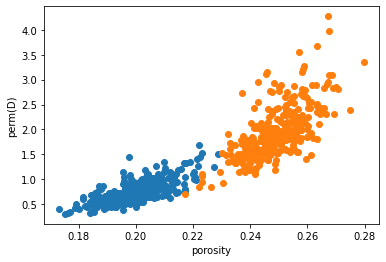

In [4]:
#Data
#Limestone
phi_l = np.abs(np.random.normal(0.20,0.01,300))
swc_l = np.abs(np.random.normal(0.1,0.01,300))
k_l = 8.58102*(phi_l**(4.4))/(swc_l**2)
plt.scatter(phi_l,k_l)
plt.scatter(phi_s,k_s)
plt.xlabel('porosity')
plt.ylabel('perm(D)')

In [5]:
#DataFrame Sandstone
dfS = pd.DataFrame({'Porosity':phi_s , 'Swc':swc_s, 'Permeability(D)':k_s})
dfS['label'] = 1
label_s = np.array(dfS['label'])
dfS['lithology'] = "Sandstone"
lithologyS = np.array(dfS['lithology'])
dfS

,Porosity,Swc,Permeability(D),label,lithology
0,0.249829,0.103133,1.804554,1,Sandstone
1,0.262863,0.091175,2.887986,1,Sandstone
2,0.258465,0.083375,3.206509,1,Sandstone
3,0.242481,0.091237,2.022010,1,Sandstone
4,0.249265,0.092714,2.210858,1,Sandstone
...,...,...,...,...,...
295,0.269481,0.107723,2.308037,1,Sandstone
296,0.242949,0.112079,1.351306,1,Sandstone
297,0.239735,0.107273,1.391141,1,Sandstone
298,0.239345,0.116184,1.177469,1,Sandstone


In [6]:
#DataFrame Limestone
dfL = pd.DataFrame({'Porosity':phi_l , 'Swc':swc_l, 'Permeability(D)':k_l})
dfL['label'] = 2
label_l = np.array(dfL['label'])
dfL['lithology'] = "Limestone"
lithologyL = np.array(dfL['lithology'])
dfL

,Porosity,Swc,Permeability(D),label,lithology
0,0.197376,0.108125,0.582087,2,Limestone
1,0.198066,0.105325,0.622925,2,Limestone
2,0.195019,0.096962,0.686563,2,Limestone
3,0.198209,0.111844,0.554186,2,Limestone
4,0.207635,0.087544,1.109722,2,Limestone
...,...,...,...,...,...
295,0.193234,0.111023,0.502898,2,Limestone
296,0.189252,0.093014,0.653768,2,Limestone
297,0.196116,0.103486,0.617780,2,Limestone
298,0.216854,0.088331,1.319613,2,Limestone


In [7]:
#Combining DataFrame of sandstone and limestone and shuffling
phi = np.append(phi_s,phi_l)
k = np.append(k_s,k_l)
swc = np.append(swc_s,swc_l)
label = np.append(label_s,label_l)
lithology = np.append(lithologyS,lithologyL)
df = pd.DataFrame({'Porosity':phi ,  'Permeability(D)':k,'Swc':swc, 'Label':label, "Lithology":lithology})
#Shuffling data
df = df.sample(frac = 1) 
df.head()

,Porosity,Permeability(D),Swc,Label,Lithology
134,0.264704,2.427311,0.100990,1,Sandstone
532,0.191751,0.472774,0.112581,2,Limestone
62,0.238065,1.146643,0.116355,1,Sandstone
523,0.184427,0.672056,0.086673,2,Limestone
224,0.248875,1.388434,0.116591,1,Sandstone


In [8]:
#Setting Lithology with Label for Easy Prediction
lithology_name = dict(zip(df.Label.unique(), df.Lithology.unique()))   
lithology_name

{1: 'Sandstone', 2: 'Limestone'}

In [9]:
#Train, Test Split
X = df[['Porosity',  'Permeability(D)']]
y = df['Label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
#KNN Training
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1) #nearest neigbour = 1
knn.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
#Accuracy of our classifier
knn.score(X_test, y_test)

0.9933333333333333

In [14]:
#Prediction example
a = float(input("Enter the value of porosity: "))
b = float(input("Enter the value of perm(Darcy): "))
Lith = knn.predict([[a,b]])
Name = lithology_name[Lith[0]]
print("The lithology is" , Name)

Enter the value of porosity: 0.1
Enter the value of perm(Darcy): 1
The lithology is Limestone


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

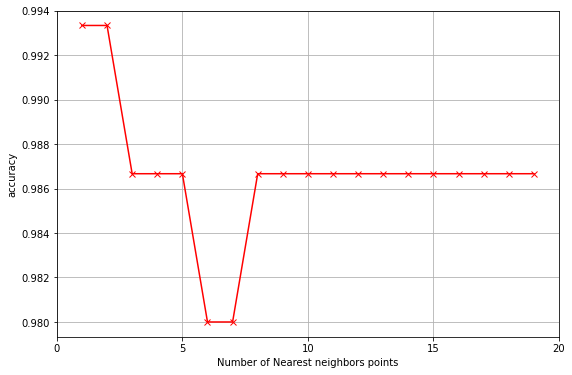

In [15]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize = (9,6))
plt.xlabel('Number of Nearest neighbors points')
plt.ylabel('accuracy')
plt.grid()
plt.plot(k_range, scores,marker = "x",color = "red")
plt.xticks([0,5,10,15,20]);